# Importing libraries

In [2]:
from openpy_ts_clu import clustering_kmeans, scenarios
import matplotlib.pyplot as plt

G:\Mi unidad\GitHub\OpenPy-TS-Clu\openpy_ts_clu\clustering_algorithm.py:16: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


# Load path of the dataset

In [22]:
path_AMI = r"G:\Mi unidad\UNSJ-IEE\Estudio PhD REID\Avances de Tesis PhD\3. Pseudomedicones para EESD\Data BBDD\London_Low_Carbon\dataset_imputation_30min.csv"

# Load scenarios

In [23]:
dict_sce = scenarios.dictionary()
dict_sce['seasons'] = ['Winter']  # ['Summer', 'Fall', 'Winter', 'Spring']
# dict_sce['month'] = ['January']  # ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# dict_sce['year'] = [2013]  # [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
dict_sce['day_name'] = ['Monday']  # ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dict_sce['day_type'] = ['working']  # ['working', 'non-working']

# Create dataset with multiple users

In [24]:
df_multi = scenarios.multiple_users(
        file_path=path_AMI,
        dict_scenario=dict_sce,
        id_col_users='LCLid',
        variable='energy(kWh/hh)'
    )

In [25]:
df_multi.head()

LCLid,MAC000018,MAC000021,MAC000023,MAC000033,MAC000034,MAC000036,MAC000054,MAC000060,MAC000078,MAC000086,...,hour,day,weekday,month,year,seasons,day_name,day_type,date,count_day
index,,,,,,,,,,,,,,,,,,,,,
2012-06-04 00:00:00,0.181,0.388,0.122,0.178,0.102,0.000,0.095,0.069,0.013,0.048,...,0,4,0,June,2012,Winter,Monday,working,2012-06-04,D194
2012-06-04 00:30:00,0.129,0.382,0.073,0.138,0.083,0.009,0.112,0.080,0.030,0.078,...,0,4,0,June,2012,Winter,Monday,working,2012-06-04,D194
2012-06-04 01:00:00,0.121,0.394,0.053,0.137,0.095,0.062,0.089,0.281,0.044,0.086,...,1,4,0,June,2012,Winter,Monday,working,2012-06-04,D194
2012-06-04 01:30:00,0.123,0.385,0.055,0.155,0.142,0.000,0.098,0.350,0.025,0.057,...,1,4,0,June,2012,Winter,Monday,working,2012-06-04,D194
2012-06-04 02:00:00,0.187,0.392,0.053,0.140,0.137,0.000,0.107,0.075,0.013,0.057,...,2,4,0,June,2012,Winter,Monday,working,2012-06-04,D194


In [26]:
df_multi.shape

(1248, 43)

# Clustering using KMeans

## Init class to clustering

In [27]:
model = clustering_kmeans(
    model='KMeans',
    users=None,
    metric='dtw',
    df_sce=df_multi,
    type_dr='mds'
)


## Optimal number of clusters

  0%|          | 0/8 [00:00<?, ?it/s]

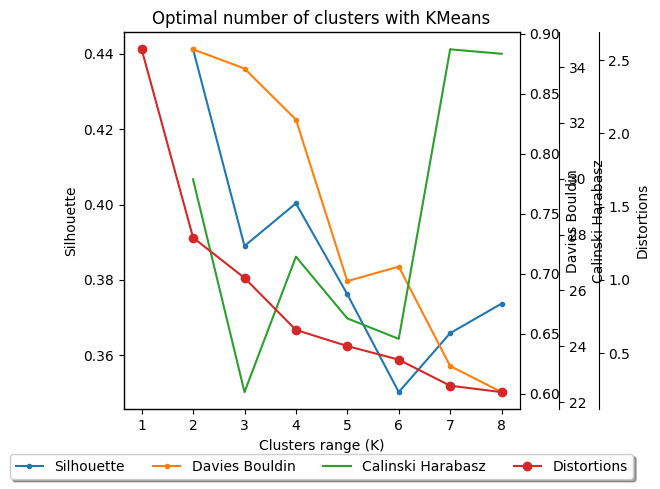

,Silhouette,Davies Bouldin,Calinski Harabasz,Clusters range (K),Distortions
0,NaN,NaN,NaN,1,2.573545
1,0.441199,0.887028,29.972225,2,1.287368
2,0.388984,0.871033,22.355911,3,1.012494
3,0.400310,0.828470,27.206006,4,0.657367
4,0.376154,0.693762,24.994861,5,0.547220
5,0.350185,0.705864,24.262397,6,0.454221
6,0.365848,0.622961,34.632615,7,0.276374
7,0.373683,0.601220,34.473844,8,0.232797


In [28]:
model.optimal_number_of_clusters(max_clusters=8, plt_metrics=True)

## Get dendogram

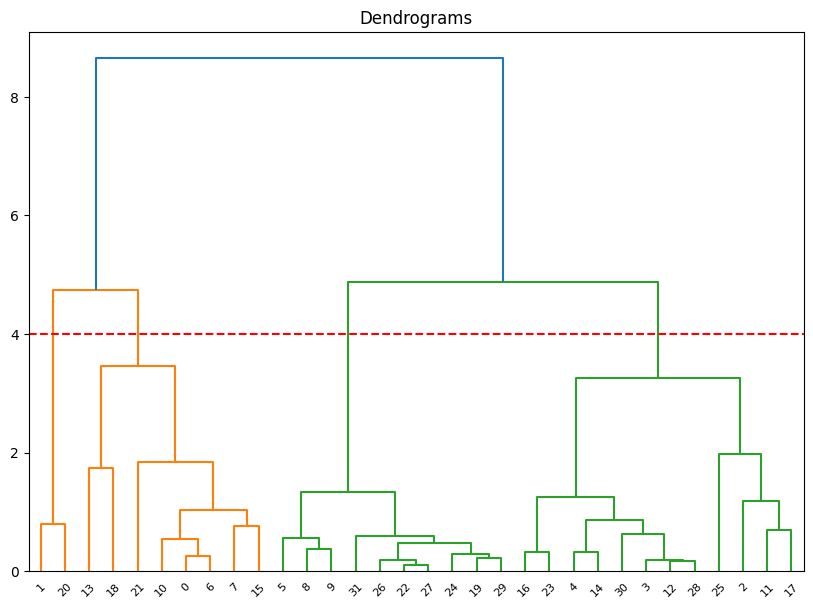

In [29]:
model.get_dendograma(n_cluster=4)

## Train clustering model

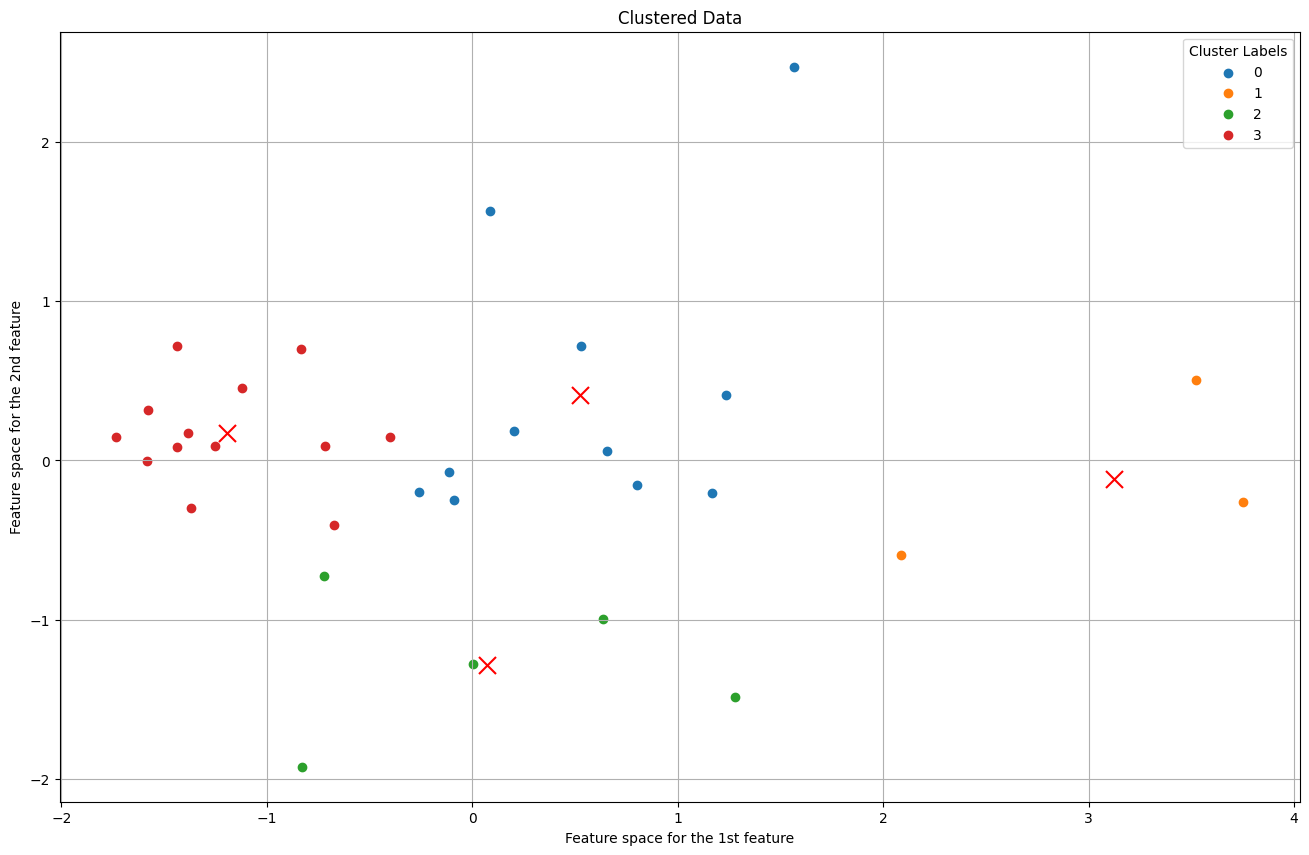

In [30]:
dict_clu = model.train_clu_model(n_clusters=4, acum_bar=True, points_2d=True)

In [31]:
dict_clu.keys()

dict_keys(['clu_model', 'ts_clustered', 'cluster_labels', 'data', 'ts_scaler', 'dict_scaler', 'dataset', 'clusters', 'data_user'])

In [32]:
dict_clu['dataset']

,00:00,00:30,01:00,01:30,02:00,02:30,03:00,03:30,04:00,04:30,...,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,cluster,user
MAC000018,0.206264,0.203702,0.19376,0.200048,0.184149,0.159659,0.14201,0.153409,0.14651,0.150154,...,0.174043,0.225966,0.323635,0.336269,0.32788,0.315394,0.290269,0.292615,0,MAC000018
MAC000021,0.324841,0.320731,0.312192,0.311812,0.331389,0.307577,0.318577,0.325231,0.318692,0.326154,...,0.497947,0.515077,0.502577,0.511,0.521154,0.456803,0.409563,0.348034,1,MAC000021
MAC000023,0.084327,0.080361,0.086668,0.08326,0.084404,0.083769,0.076577,0.082346,0.083538,0.076404,...,0.277716,0.244812,0.256385,0.257923,0.197269,0.144654,0.116221,0.097452,2,MAC000023
MAC000033,0.143308,0.129885,0.1135,0.093279,0.078731,0.075269,0.065269,0.067923,0.067841,0.078365,...,0.292308,0.328462,0.336615,0.253933,0.217865,0.181654,0.176755,0.160308,0,MAC000033
MAC000034,0.1,0.095548,0.100817,0.09751,0.088423,0.089,0.083495,0.088269,0.092029,0.094298,...,0.154413,0.177125,0.199846,0.194952,0.200615,0.198341,0.171846,0.133769,3,MAC000034
MAC000036,0.028192,0.024769,0.025231,0.027615,0.018615,0.016769,0.032923,0.029808,0.013154,0.021462,...,0.138462,0.075846,0.057538,0.034962,0.033769,0.031769,0.030038,0.022923,3,MAC000036
MAC000054,0.165962,0.152,0.132154,0.118365,0.108538,0.102346,0.103173,0.098115,0.096462,0.099409,...,0.265529,0.265615,0.290865,0.271567,0.273005,0.258154,0.227769,0.180851,0,MAC000054
MAC000060,0.071192,0.069087,0.065159,0.125654,0.059077,0.057298,0.054231,0.056192,0.057615,0.051077,...,0.243423,0.292269,0.396962,0.432308,0.378,0.332337,0.264644,0.144875,0,MAC000060
MAC000078,0.036462,0.034962,0.035577,0.033385,0.031385,0.031923,0.030423,0.028385,0.026731,0.034029,...,0.205327,0.184923,0.169808,0.192462,0.168029,0.118764,0.064058,0.043962,3,MAC000078
MAC000086,0.074385,0.05824,0.060106,0.056,0.048385,0.049813,0.043678,0.053827,0.053404,0.073654,...,0.080476,0.081962,0.055769,0.054337,0.057,0.057654,0.061481,0.075462,3,MAC000086


## Extract time series of clusters

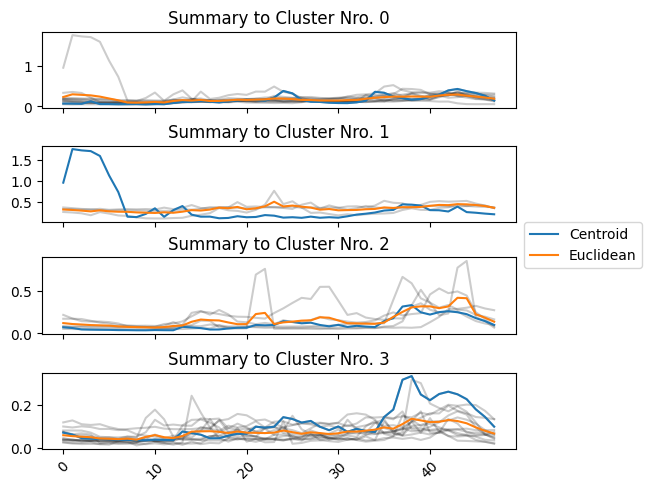

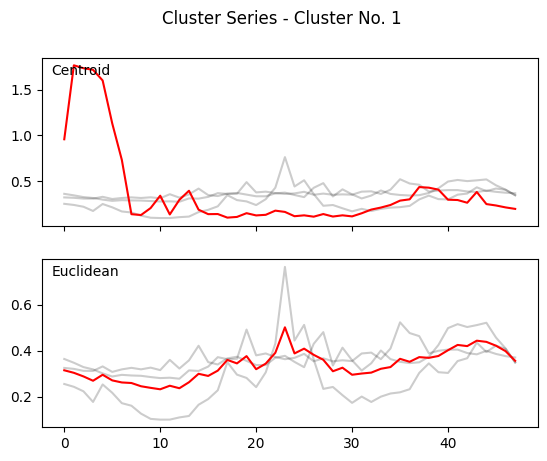

G:\Mi unidad\GitHub\OpenPy-TS-Clu\openpy_ts_clu\clustering_algorithm.py:697: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


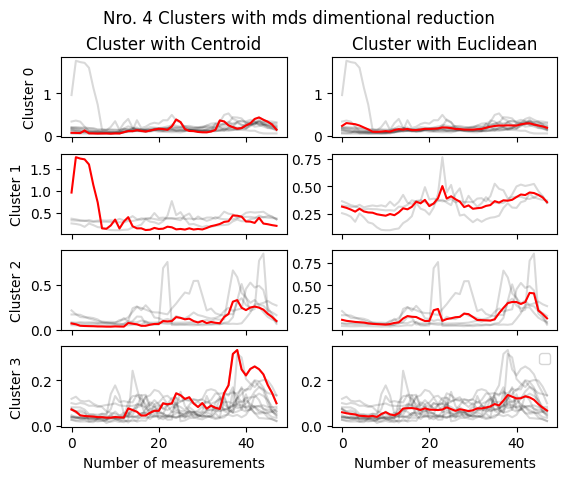

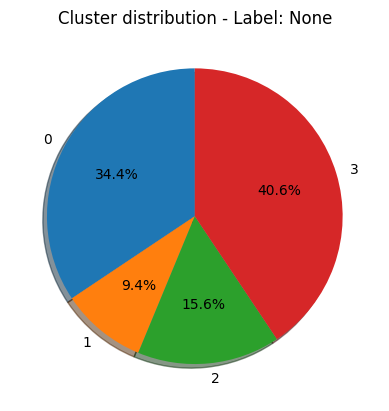

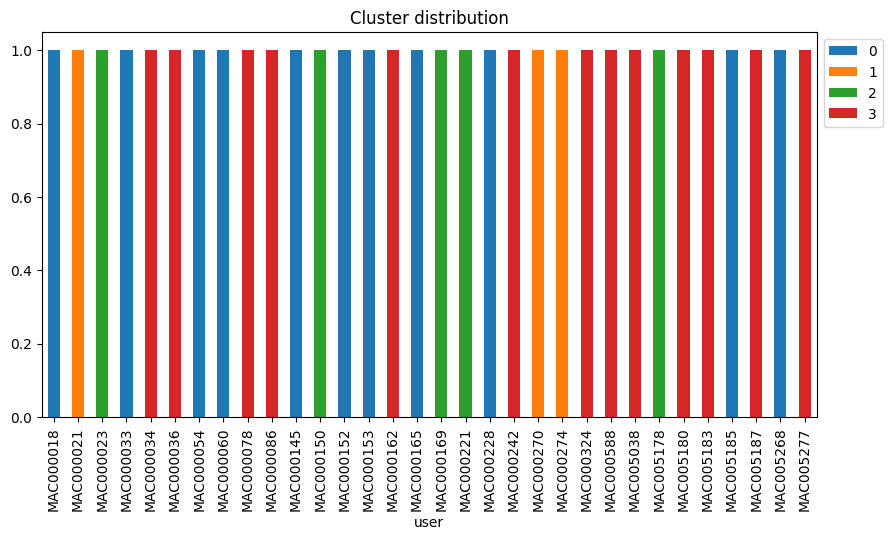

In [33]:
dict_clu = model.cluster_ts_extraction(n_clusters=4, all_barycenters=True, plt_all_graphs=True)

In [34]:
dict_clu.keys()

dict_keys(['dataset', 'clusters', 'centroid', 'euclidean'])

In [35]:
len(dict_clu['dataset'])

832

In [36]:
len(dict_clu['euclidean'])

4

## Plot time series of clusters and barycenters

### Centroids

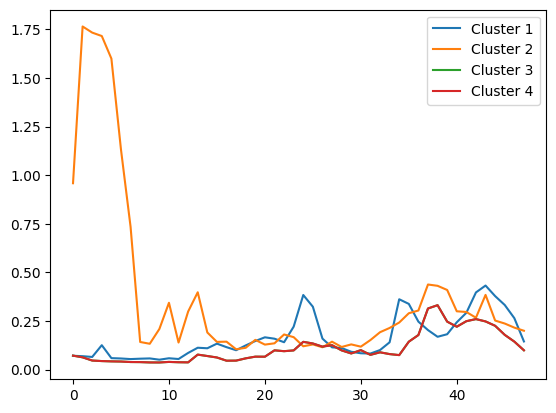

In [37]:
for i in range(len(dict_clu['centroid'])):
    plt.plot(dict_clu['centroid'][i], label='Cluster ' + str(i + 1))
plt.legend()

In [38]:
dict_clu['centroid'][0].T

array([[0.07119231, 0.06908654, 0.06515865, 0.12565385, 0.05907692,
        0.05729808, 0.05423077, 0.05619231, 0.05761538, 0.05107692,
        0.05845192, 0.05455769, 0.08584615, 0.11255769, 0.10980769,
        0.13353846, 0.11553846, 0.09973077, 0.12447115, 0.14694712,
        0.16616827, 0.15904327, 0.14086538, 0.22099519, 0.38369231,
        0.32339423, 0.15947115, 0.11458173, 0.11111538, 0.09169231,
        0.08411538, 0.08265385, 0.10057692, 0.14054808, 0.36184615,
        0.33796635, 0.24669231, 0.20328365, 0.16886538, 0.18201923,
        0.24342308, 0.29226923, 0.39696154, 0.43230769, 0.378     ,
        0.33233654, 0.26464423, 0.144875  ]])

### Euclidean

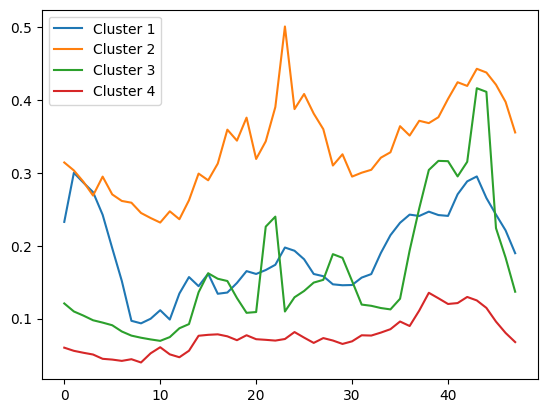

In [39]:
for i in range(len(dict_clu['euclidean'])):
    plt.plot(dict_clu['euclidean'][i], label='Cluster ' + str(i + 1))
plt.legend()

In [40]:
dict_clu['euclidean'][0].T

array([[0.23291958, 0.30032692, 0.28678365, 0.2738125 , 0.24268007,
        0.19678584, 0.15173776, 0.09706337, 0.09357955, 0.09989773,
        0.11160358, 0.09880376, 0.13455682, 0.15717483, 0.1446604 ,
        0.16177448, 0.13419886, 0.1359021 , 0.14909309, 0.16532386,
        0.16142526, 0.16680288, 0.17401748, 0.19773208, 0.19328059,
        0.18157561, 0.16138899, 0.15833392, 0.14718226, 0.14590647,
        0.14625612, 0.1564139 , 0.16126093, 0.19027972, 0.21467745,
        0.23170105, 0.24293488, 0.24104939, 0.24699301, 0.24232343,
        0.24116477, 0.27084528, 0.28860227, 0.29537544, 0.26575787,
        0.24299432, 0.22126486, 0.18992439]])